

# **1.   Configuration**



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
opportunities = pd.read_csv('/content/gdrive/My Drive/HKUST_Fintech_Course_Data/opportunities_table_for_prediction_v3.csv', engine='python')
opportunities = opportunities.iloc[:,2:]

In [ ]:
#reverse engineer the country mapping table
#opportunities[['name_entity', 'Region']].groupby(['name_entity', 'Region']).size().to_csv('/content/gdrive/My Drive/HKUST_Fintech_Course_Data/countries_mapping.csv')

# **2. Data Profiling**

##### **2.1 Data Profiling - Overall Data**

In [ ]:
##Quick overview of the data
opportunities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381484 entries, 0 to 381483
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   opportunity_id                  381484 non-null  int64  
 1   created_at                      381484 non-null  object 
 2   applications_close_date         90789 non-null   object 
 3   openings                        381484 non-null  int64  
 4   earliest_start_date             381484 non-null  object 
 5   latest_end_date                 381458 non-null  object 
 6   duration_min                    381484 non-null  int64  
 7   programme_id                    381484 non-null  object 
 8   name_region                     381484 non-null  object 
 9   name_entity                     381484 non-null  object 
 10  favourites_count                381484 non-null  int64  
 11  opportunity_applications_count  381484 non-null  int64  
 12  status          

In [ ]:
##Quick overview of the actual data
opportunities.head()

,opportunity_id,created_at,applications_close_date,openings,earliest_start_date,latest_end_date,duration_min,programme_id,name_region,name_entity,favourites_count,opportunity_applications_count,status,month_created,year_created,background_p_count,skill_r_count,skill_p_count,language_r_count,language_p_count,new_status,realized,created_month,open_window,flexibility,start_month,Region,Arts,Business,Engineering,Humanity,Other,Politics,Science
0,290499,2014-11-05,2015-03-30,1,2015-02-01,2015-07-31,20,Global Talent,Americas,Peru,0,3,open,2014-11-01,2014-01-01,0,4,3,2,0,realized,1,11,145.0,180.0,2,South America,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,290500,2014-11-05,2015-06-15,1,2014-12-15,2015-06-15,20,Global Talent,Asia Pacific,India,0,4,open,2014-11-01,2014-01-01,1,7,1,1,0,realized,1,11,222.0,182.0,12,South-central Asia,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,290502,2014-11-17,2015-01-01,1,2014-11-17,2015-11-17,50,Global Talent,AIESEC INTERNATIONAL,Asia Pacific,0,4,open,2014-11-01,2014-01-01,0,5,3,1,0,NaN,0,11,45.0,365.0,11,Asia Pacific,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,290503,2014-11-05,2014-12-31,1,2015-01-01,2015-07-31,24,Global Talent,AIESEC INTERNATIONAL,Asia Pacific,0,19,open,2014-11-01,2014-01-01,1,2,1,1,0,realized,1,11,56.0,211.0,1,Asia Pacific,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,290505,2015-01-05,2016-01-01,1,2015-05-12,2016-01-27,6,Global Volunteer,Americas,Costa Rica,9,7,open,2015-01-01,2015-01-01,1,3,1,1,3,realized,1,1,361.0,260.0,5,Central America,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##Quick overiew of the basic statistics of the data
opportunities.realized = opportunities.realized.astype('int')
opportunities.describe()

,opportunity_id,openings,duration_min,favourites_count,opportunity_applications_count,background_p_count,skill_r_count,skill_p_count,language_r_count,language_p_count,realized,created_month,open_window,flexibility,start_month,Arts,Business,Engineering,Humanity,Other,Politics,Science
count,381484.000000,381484.000000,381484.00000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000,381484.000000
mean,520723.429090,1.890344,12.30947,1.628191,7.238526,1.150242,2.410437,2.962947,0.911865,0.715760,0.403372,6.499581,155.430255,157.004313,6.275133,0.126123,0.182296,0.045462,0.007964,0.056023,0.000849,0.004276
std,155806.937544,3.372766,13.71868,8.354226,32.190732,0.822548,2.325688,2.503923,0.672084,1.101138,0.490575,3.319524,61.628123,154.677986,3.314781,0.323906,0.378767,0.204816,0.083058,0.217634,0.026095,0.059930
min,290499.000000,0.000000,-6.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,397761.750000,1.000000,6.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,159.396836,49.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,497087.500000,1.000000,6.00000,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,0.000000,6.000000,159.396836,78.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,597490.250000,1.000000,12.00000,0.000000,1.000000,2.000000,4.000000,4.000000,1.000000,1.000000,1.000000,9.000000,159.396836,212.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,893776.000000,29.000000,78.00000,531.000000,2281.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,12.000000,625.000000,1095.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### **2.1 Data Profiling - Target Variable**

In [ ]:
##The distribution of the target variable
Realized_opp = opportunities.groupby('realized')['opportunity_id'].nunique().loc[True]
Not_realized_opp = opportunities.groupby('realized')['opportunity_id'].nunique().loc[False]

print('The realization rate is ', round(Realized_opp/(Realized_opp+Not_realized_opp),3))
print('The baseline using majority classifer is ', round(Not_realized_opp/(Realized_opp+Not_realized_opp),3))

The realization rate is  0.403
The baseline using majority classifer is  0.597


In [ ]:
##Correlation against the target variable
opportunities.corr()['realized'].sort_values(ascending = False)

realized                          1.000000
opportunity_applications_count    0.086392
favourites_count                  0.077387
Arts                              0.051803
open_window                       0.041259
Other                             0.024518
background_p_count                0.015446
language_p_count                  0.015106
Humanity                          0.009168
language_r_count                  0.008230
Politics                          0.007128
Science                           0.002954
skill_r_count                    -0.011309
skill_p_count                    -0.014728
Business                         -0.023705
start_month                      -0.025533
created_month                    -0.031847
openings                         -0.033402
Engineering                      -0.054813
duration_min                     -0.061490
opportunity_id                   -0.078686
flexibility                      -0.123820
Name: realized, dtype: float64

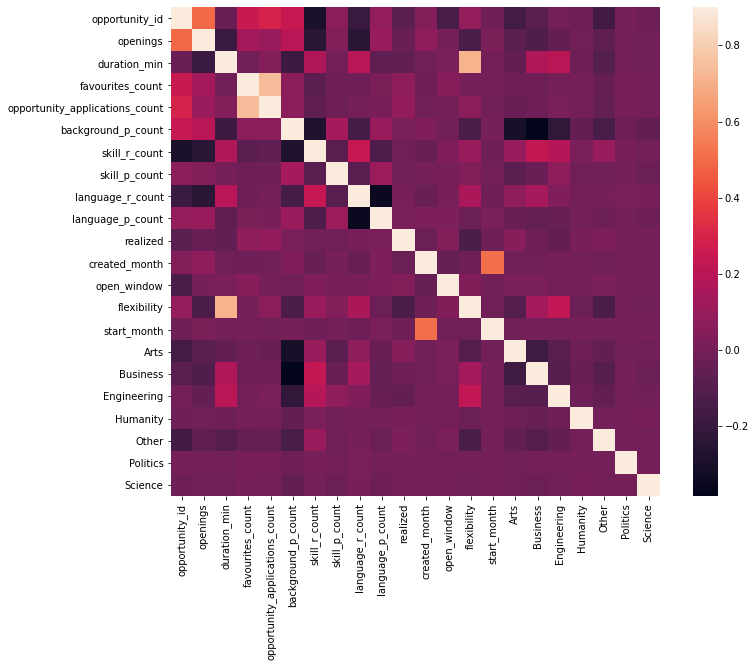

In [ ]:
##Correlation map to see how features are correlated with the target variable

corrmat = opportunities.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

programme_id         realized
Global Entrepreneur  0             5705
                     1             1915
Global Talent        0            90885
                     1            41413
Global Volunteer     0           131014
                     1           110552
Name: opportunity_id, dtype: int64
Region                     realized
Asia Pacific               0            3538
                           1            1664
Australia and New Zealand  0             410
                           1             317
Caribbean                  0             132
                           1              55
Central America            0            3775
                           1            5240
Central Asia               0             510
                           1             376
Eastern Africa             0            7152
                           1            5295
Eastern Asia               0           19055
                           1           11583
Eastern Europe             0 

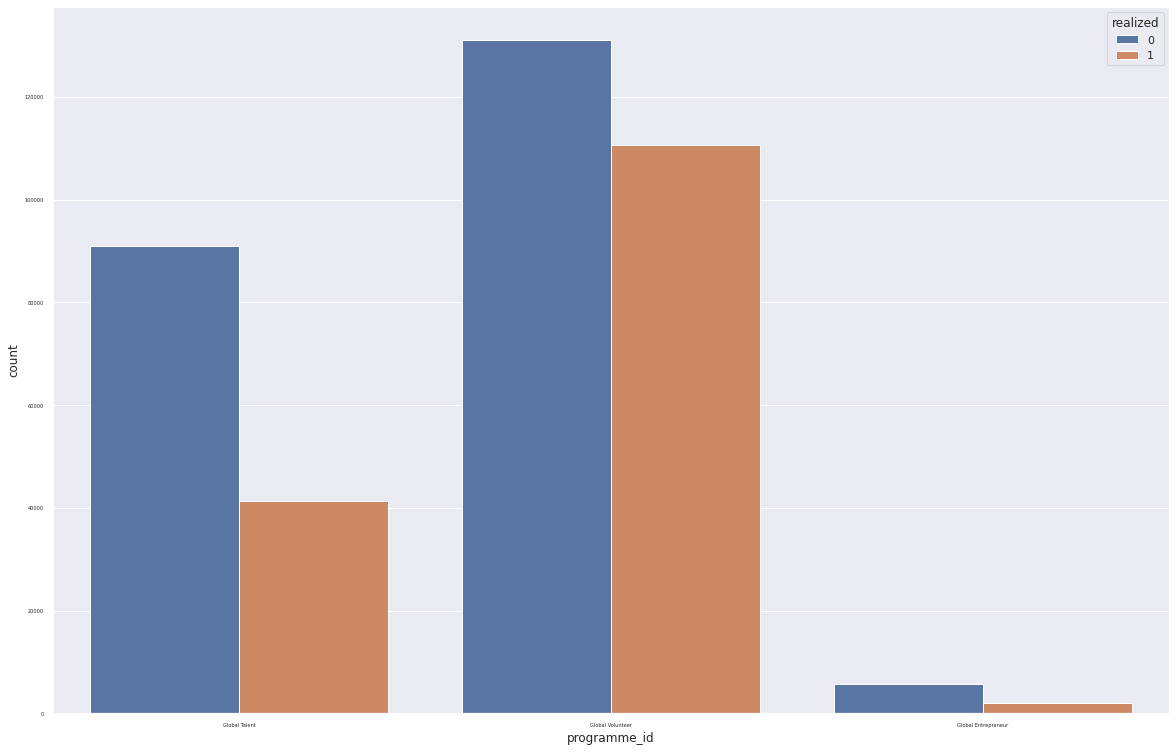

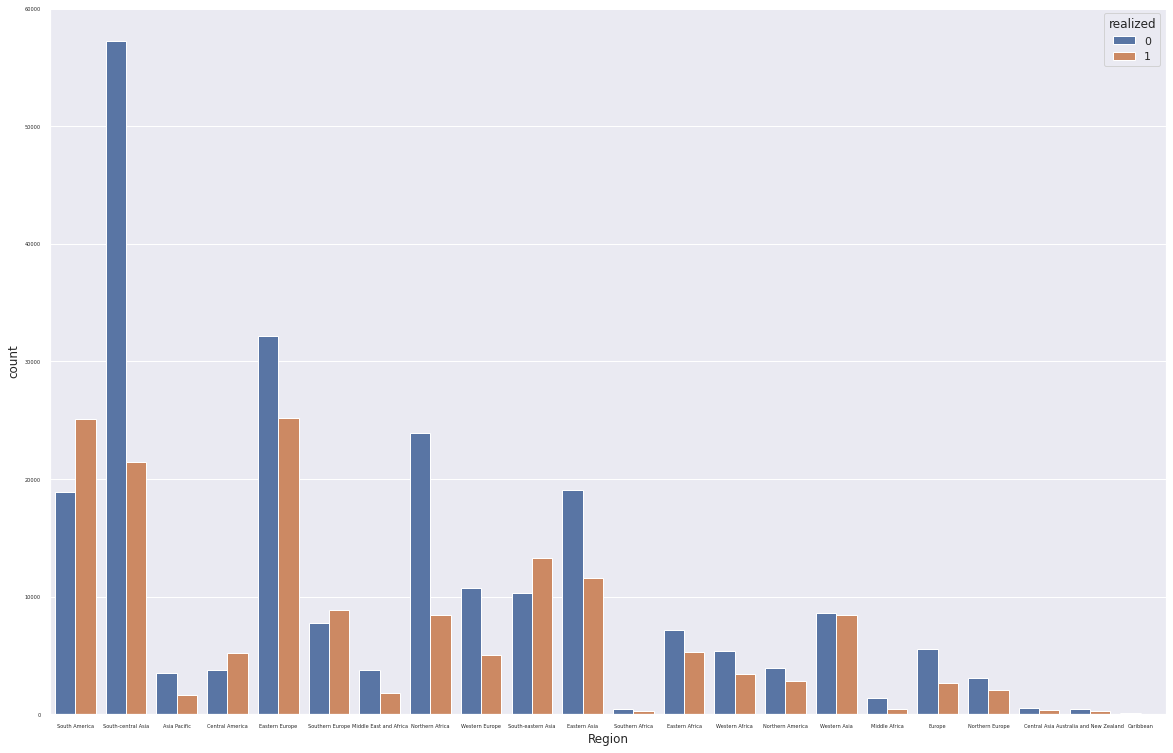

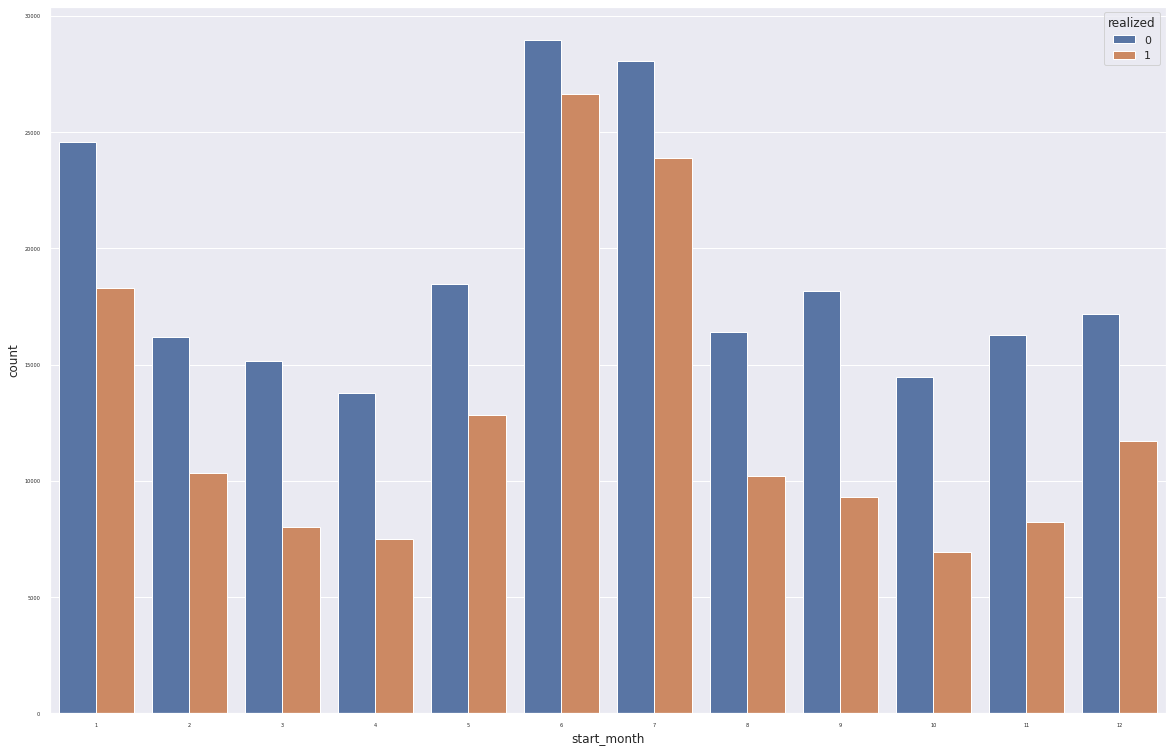

In [ ]:
#plot chosen categorical variables against the target variable
barchart_variable = ['programme_id', 'Region', 'start_month']
target_variable = 'realized'

#fig, axes = plt.subplots(nrows=np.ceil(len(boxplot_variable)/4), ncols=4)
for index, i in enumerate(barchart_variable, start = 0):
    print(opportunities.groupby([i,target_variable]).count()['opportunity_id'])
    sns.set()
    fig, ax = plt.subplots(figsize = (20,13))
    ax = sns.countplot(x = i, hue = target_variable, data = opportunities)
    ax.tick_params(labelsize=5)
    #opportunities.boxplot(column = [target_variable], by = [i], ax = axes[])

**Observation**

For programme_id, we observe that global volunteer program has the highest realization rate.

For Region, South America, Central America, Southern Europe and South-eastern Asia have higher realized opportunities than not realized opportunities. This indicates the flavor of the participants.

For start_month, opportunities that started at Dec, Jan, June and July have a higher realization rate. This might be due to the winter and summer holidays.

# **3. Data Processing for ML**

In [ ]:
## select out the important features
opportunities_cleaned = opportunities[['realized', 'start_month', 'programme_id', 'name_entity', 'duration_min', 'Arts', 'Business', 'Engineering', 'Humanity', 'Other', 'Politics', 'Science', 'background_p_count', 'skill_r_count', 'skill_p_count', 'language_r_count', 'language_p_count','open_window','flexibility','openings']]

**Rationale of variables selection**

**t0 data**

The first rationale would be using variables at t0. As we would like provide the output score for marketing team to prioritise the opportunities, we would like to select the variables which would only appear upon opportunity creation. Therefore, "favourites_count" and "opportunity_applications_count" will be excluded.

**Time Variable**

As we would like to predict based on the inner attributes of the opportunity, we will exclude the time related variables. Yet, start_month will be maintained as this shows the seasonality of favorites and will be treated as a categorical variable.

In [ ]:
## one-hot encoding
opportunities_cleaned_one_hot = pd.get_dummies(opportunities_cleaned, columns=['programme_id', 'name_entity', 'start_month'])

## normalize the dataset
dataset = opportunities_cleaned_one_hot.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split X and y
X = dataset[:,1:]
y = dataset[:,0]

## split to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

## change data type
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

## evaluate the shape of data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(343335, 160) (343335,)
(38149, 160) (38149,)


In [ ]:
## evaluate the correlation against target variable after one-hot encoding
opportunities_cleaned_one_hot.corr()["realized"].sort_values(ascending=False)

realized                         1.000000
programme_id_Global Volunteer    0.145371
name_entity_Brazil               0.078199
name_entity_Argentina            0.071525
start_month_6                    0.063918
                                   ...   
duration_min                    -0.061490
name_entity_Egypt               -0.108029
flexibility                     -0.123820
programme_id_Global Talent      -0.134187
name_entity_India               -0.145362
Name: realized, Length: 161, dtype: float64

# **4. Modelling and Evaluation**

4 models will be used for the prediction. (Multi-layer perceptron, Naive Bayes, Decision Tree and Logistics Regression)

**4.1 Multi-layer Perceptron (Deep Learning)**

In [ ]:
from keras import regularizers
from keras.layers import Dropout
num_pixels = X.shape[1]
def base_model():

  model = Sequential()
  model.add(Dense(200, input_dim=num_pixels,kernel_initializer='normal', activation='relu',kernel_regularizer=regularizers.l2(0.00005)))
  model.add(Dropout(0.25))
  model.add(Dense(100, kernel_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(0.00005)))
  model.add(Dropout(0.25))
  model.add(Dense(50, kernel_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(0.00005)))
  model.add(Dropout(0.25))
  #model.add(Dense(50, kernel_initializer='normal',activation='relu',kernel_regularizer=regularizers.l2(0.001)))
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model
  
dnn_n = base_model()
dnn_n.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               32200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
import numpy
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score

# Fit the model
history = dnn_n.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=128,verbose=2)
scores = dnn_n.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/25
2683/2683 - 9s - loss: 0.6233 - accuracy: 0.6664 - val_loss: 0.6182 - val_accuracy: 0.6715
Epoch 2/25
2683/2683 - 9s - loss: 0.6147 - accuracy: 0.6761 - val_loss: 0.6146 - val_accuracy: 0.6787
Epoch 3/25
2683/2683 - 9s - loss: 0.6121 - accuracy: 0.6791 - val_loss: 0.6134 - val_accuracy: 0.6794
Epoch 4/25
2683/2683 - 9s - loss: 0.6103 - accuracy: 0.6815 - val_loss: 0.6112 - val_accuracy: 0.6798
Epoch 5/25
2683/2683 - 9s - loss: 0.6085 - accuracy: 0.6830 - val_loss: 0.6092 - val_accuracy: 0.6845
Epoch 6/25
2683/2683 - 9s - loss: 0.6077 - accuracy: 0.6853 - val_loss: 0.6108 - val_accuracy: 0.6812
Epoch 7/25
2683/2683 - 9s - loss: 0.6067 - accuracy: 0.6866 - val_loss: 0.6073 - val_accuracy: 0.6862
Epoch 8/25
2683/2683 - 9s - loss: 0.6061 - accuracy: 0.6871 - val_loss: 0.6081 - val_accuracy: 0.6861
Epoch 9/25
2683/2683 - 9s - loss: 0.6049 - accuracy: 0.6881 - val_loss: 0.6052 - val_accuracy: 0.6869
Epoch 10/25
2683/2683 - 9s - loss: 0.6047 - accuracy: 0.6882 - val_loss: 0.6065 - 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


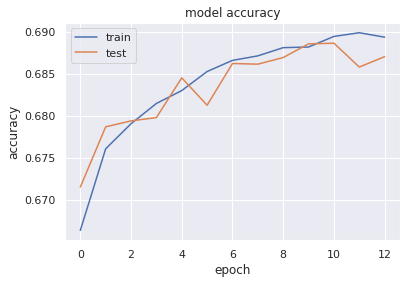

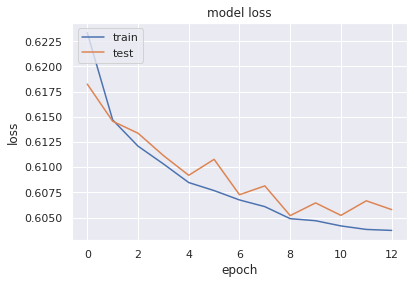

In [ ]:
import matplotlib.pyplot as plt

#assign the result to here
result = (history)

# list all data in history
print(result.history.keys())
# summarize history for accuracy
plt.plot(result.history['accuracy'][0:13])
plt.plot(result.history['val_accuracy'][0:13])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'][0:13])
plt.plot(result.history['val_loss'][0:13])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
## > 0.9
compared_result_threshold = compared_result.assign(Prediction = abs(compared_result.Predicted_class - compared_result.Actual_class))[compared_result.Predicted_Probi > 0.9].groupby("Prediction").count()
realized_opp = compared_result_threshold.get("Predicted_Probi")[0]
total_opp_with_threshold = (compared_result_threshold.get("Predicted_Probi")[0] + compared_result_threshold.get("Predicted_Probi")[1])
realized_rate_with_threshold = realized_opp / total_opp_with_threshold
print("The number of opportunity with threshold greater than 0.9 is",total_opp_with_threshold ,"and the realized rate is", realized_rate_with_threshold)

## < 0.9 and > 0.8
compared_result_threshold = compared_result.assign(Prediction = abs(compared_result.Predicted_class - compared_result.Actual_class))[(compared_result.Predicted_Probi < 0.9) & (compared_result.Predicted_Probi > 0.8)].groupby("Prediction").count()
realized_opp = compared_result_threshold.get("Predicted_Probi")[0]
total_opp_with_threshold = (compared_result_threshold.get("Predicted_Probi")[0] + compared_result_threshold.get("Predicted_Probi")[1])
realized_rate_with_threshold = realized_opp / total_opp_with_threshold
print("The number of opportunity with threshold >0.8 and <0.9 is",total_opp_with_threshold ,"and the realized rate is", realized_rate_with_threshold)

## < 0.8 and > 0.7
compared_result_threshold = compared_result.assign(Prediction = abs(compared_result.Predicted_class - compared_result.Actual_class))[(compared_result.Predicted_Probi < 0.8) & (compared_result.Predicted_Probi > 0.7)].groupby("Prediction").count()
realized_opp = compared_result_threshold.get("Predicted_Probi")[0]
total_opp_with_threshold = (compared_result_threshold.get("Predicted_Probi")[0] + compared_result_threshold.get("Predicted_Probi")[1])
realized_rate_with_threshold = realized_opp / total_opp_with_threshold
print("The number of opportunity with threshold >0.7 and <0.8 is",total_opp_with_threshold ,"and the realized rate is", realized_rate_with_threshold)

## < 0.6 and > 0.5
compared_result_threshold = compared_result.assign(Prediction = abs(compared_result.Predicted_class - compared_result.Actual_class))[(compared_result.Predicted_Probi < 0.6) & (compared_result.Predicted_Probi > 0.5)].groupby("Prediction").count()
realized_opp = compared_result_threshold.get("Predicted_Probi")[0]
total_opp_with_threshold = (compared_result_threshold.get("Predicted_Probi")[0] + compared_result_threshold.get("Predicted_Probi")[1])
realized_rate_with_threshold = realized_opp / total_opp_with_threshold
print("The number of opportunity with threshold >0.6 and <0.7 is",total_opp_with_threshold ,"and the realized rate is", realized_rate_with_threshold)

The number of opportunity with threshold greater than 0.9 is 115 and the realized rate is 0.9217391304347826
The number of opportunity with threshold >0.8 and <0.9 is 561 and the realized rate is 0.8342245989304813
The number of opportunity with threshold >0.7 and <0.8 is 2465 and the realized rate is 0.7683569979716024
The number of opportunity with threshold >0.6 and <0.7 is 3893 and the realized rate is 0.5630619059851014


**4.2 Naive Bayes Model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create a naive bayes classifier
model_naive =GaussianNB()
model_naive.fit(X_train, y_train)
y_pred_naive_grade = model_naive.predict(X_test)

#calculate the accuracy
accuracy_score(y_test, y_pred_naive_grade)

0.6210909853469292

**4.3 decision tree model**

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=40,min_samples_leaf=100)
clf = clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree_prob = clf.predict_proba(X_test)

y_pred_tree_prob.shape
#calculate the accuracy
accuracy_score(y_test, y_pred_tree)

0.6847885920993997

**4.4 logistic regression model**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.predict_proba(X_test) 
y_pred_logistic = clf.predict(X_test)

#calculate the accuracy
accuracy_score(y_test, y_pred_logistic)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6597289575087159